In [1]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm

#from my_functions import find_min_distance

In [2]:
px_size = 0.1625
dt = 15 #frame interval in seconds

In [26]:
#directory = 'Baz_Jupiter//'
#title="Bazooka_ablation"

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Par1//"
#title="Par1_FRAP"

directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Bazooka//"
title="Bazooka_FRAP"


files = listdir(directory)

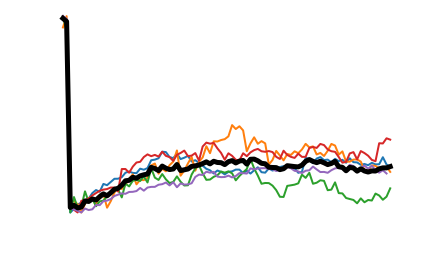

In [27]:

#COLOR = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 3))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)


intensities_all = pd.DataFrame()



for index, file in enumerate(files[0::2]):
    intensities = pd.read_csv(directory+file)
    background = pd.read_csv(directory+files[index*2+1])


    intensities["Background_norm"] = intensities.Mean - background.Mean

    intensities["Mean"] = intensities.Background_norm

    intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
    intensities[file] = intensities["Normalized"]/intensities["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]


    intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
    


    ax.plot(np.arange(len(final_intensities))*dt, final_intensities, linewidth=2)

intensities_all['Mean'] = intensities_all.mean(axis=1)
ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="black")






In [28]:

fig.savefig(f'{title}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}.png', dpi=300, transparent=True, bbox_inches='tight')

#fig.savefig(f'{title}.pdf', dpi=300, transparent=False, bbox_inches='tight')
#fig.savefig(f'{title}.png', dpi=300, transparent=False, bbox_inches='tight')

In [7]:
np.arange(len(intensities_all))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])